# Singular Value Decomposition (SVD)

The Singular-Value Decomposition, or SVD for short, is a matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations simpler.  SVD is a general matrix decomposition technique for any rectangular matrices.  A related eigen decomposition for square symmetric matrices is usally introduced in most beginning Linear Algebra course.  If you'd like to refresh the concept of eigen decomposition, here's an excellent tutorial by [Grant Sanderson](https://www.youtube.com/watch?v=PFDu9oVAE-g). It explains eigenvectors and eigenvalues visually.

For the case of simplicity we will focus on the SVD for real-valued matrices and ignore the case for complex numbers.

$ A = U \Sigma V $

Where $A$ is the real $m x n$ matrix that we wish to decompose, $U$ is an $m x m$ matrix, $\Sigma$ is an $m x n$ diagonal matrix, and $V$ is an n x n matrix, and is often written as $V^T$ where T is the matrix transpose.

The diagonal values in the Sigma matrix are known as the singular values of the original matrix $A$. The columns of the $U$ matrix are called the left-singular vectors of $A$, and the columns of $V$ are called the right-singular vectors of $A$.

### Calculate Singular-Value Decomposition

The SVD can be calculated by calling the `svd()` function.

The function takes a matrix and returns the $U$, $\Sigma$ and $V$ elements. The Sigma diagonal matrix is returned as a vector of singular values. The $V$ matrix is returned in a transposed form, e.g. $V^T$

The example below defines a $3×2$ matrix and calculates the Singular-value decomposition.

In [2]:
import numpy as np
from numpy import array
from scipy.linalg import svd

# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print(A)

# SVD
U, s, VT = svd(A)
print(U)
print(s)
print(VT)

[[1 2]
 [3 4]
 [5 6]]
[[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
[9.52551809 0.51430058]
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


In [2]:
A.shape

(3, 2)

### SVD for Dimensionality Reduction

A popular application of SVD is for dimensionality reduction.

Data with a large number of features, such as more features (columns) than observations (rows) may be reduced to a smaller subset of features that are most relevant to the prediction problem.

The result is a matrix with a lower rank that is said to approximate the original matrix.

To do this we can perform an SVD operation on the original data and select the top k largest singular values in Sigma. These columns can be selected from Sigma and the rows selected from V^T.

An approximate B of the original vector A can then be reconstructed.

$B = U \Sigma_k . V_k{^T}$

There are restrictions on 𝐔, 𝚺, and 𝐕:

𝐔 has dimensions n×k, 𝚺 has dimensions k×k, and 𝐕 has dimensions kxk.

𝐔 and 𝐕 are orthogonal matrices. That is, 𝐔⊤𝐔=𝐈 and 𝐕⊤𝐕=𝐈. This also implies that all columns of 𝐔 and 𝐕 have magnitude 1 and are mutually orthogonal.

𝚺 is a diagonal matrix. That is, all elements in 𝚺 are 0 unless they lie on the diagonal. In addition, the diagonal elements in 𝚺 are arranged from biggest to smallest.

For example, consider this matrix: 

$$\begin{bmatrix}
1 & 0\\
0 & 4\\
0 & 0
\end{bmatrix}$$

The SVD of 𝐗 is:


\begin{align}
X &= U\Sigma V^T\\
&= \begin{bmatrix}
0 & 1 & 0\\
1 & 0 & 0\\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
4 & 0\\
0 & 1\\
0 & 0
\end{bmatrix}
\begin{bmatrix}
0 & 1\\
1 & 0
\end{bmatrix}
\end{align}

We can check that this decomposition reproduces 𝐗:

In [3]:
U = np.array([
    [0, 1, 0],
    [1, 0, 0],
    [0, 0, 1],
])
S = np.array([
    [4, 0],
    [0, 1],
    [0, 0],
])
V = np.array([
    [0, 1],
    [1, 0],
])

U @ S @ V.T

array([[1, 0],
       [0, 4],
       [0, 0]])

We can also check that the matrices 𝐔, 𝚺, and 𝐕 fulfill the requirements of the SVD.

First: 𝐗 has dimensions 3×2. 𝐔 has dimensions 3×3, 𝚺 has dimensions 3×2, and 𝐕 has dimensions 2×2.

Second: 𝐔 and 𝐕 are orthogonal matrices:

In [4]:
U @ U.T

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [5]:
V @ V.T

array([[1, 0],
       [0, 1]])

Third: 𝚺 is diagonal, and its diagonal elements are arranged from greatest to least.

In [6]:
S

array([[4, 0],
       [0, 1],
       [0, 0]])

### Computing SVD in Python

To compute the SVD in Python, we use the np.linalg.svd function:

In [7]:
svd = np.linalg.svd

X = np.array([
    [1, 0],
    [0, 4],
    [0, 0]
])
svd(X)

(array([[0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.]]),
 array([4., 1.]),
 array([[0., 1.],
        [1., 0.]]))

np.linalg.svd returns a tuple of three arrays corresponding to 𝐔, 𝚺, and 𝐕⊤. Notice that the 𝚺 value is one-dimensional numpy array rather than a diagonal matrix, which can cause problems recreating 𝐗 using the return values of np.linalg.svd. For convenience, we often use full_matrices=False in our call to np.linalg.svd, which reduces the dimensions of 𝐔 or 𝐕⊤ to match the dimensions of 𝚺:

In [8]:
svd(X, full_matrices=False)

(array([[0., 1.],
        [1., 0.],
        [0., 0.]]),
 array([4., 1.]),
 array([[0., 1.],
        [1., 0.]]))

This allows us to use np.diag to create the diagonal matrix 𝚺 and reproduce the original 𝐗:

In [9]:
U, S, Vt = svd(X, full_matrices=False)
U @ np.diag(S) @ Vt

array([[1., 0.],
       [0., 4.],
       [0., 0.]])

This takes advantage of the fact that an all-zero row in a matrix multiplication can be removed.

### Latent Semantic Analysis (LSA)

In natural language processing, this approach can be used on matrices of word occurrences or word frequencies in documents and is called **Latent Semantic Analysis** or **Latent Semantic Indexing**.

Example: first a 3×10 matrix is defined, with more columns than rows. The SVD is calculated and only the first two features are selected. The elements are recombined to give an accurate reproduction of the original matrix. Finally the transform is calculated two different ways.

In [5]:
from numpy import diag
from numpy import zeros
from scipy.linalg import svd
# define a matrix
A = array([
    [1,2,3,4,5,6,7,8,9,10],
    [11,12,13,14,15,16,17,18,19,20],
    [21,22,23,24,25,26,27,28,29,30]])
print(A)
print(A.shape)

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30]]
(3, 10)


In [ ]:
# Singular-value decomposition
U, s, VT = svd(A)

In [6]:
# create m x n Sigma matrix
Sigma = zeros((A.shape[0], A.shape[1]))

# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[0], :A.shape[0]] = diag(s)

print(Sigma)

[[9.69657342e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.25578339e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.48879510e-15 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [7]:
# select the 2 most important singular values
n_elements = 2
Sigma = Sigma[:, :n_elements]
VT = VT[:n_elements, :]

Let's reconstruct with only n_elements = 2 singular values:

In [8]:
# reconstruct
B = U.dot(Sigma.dot(VT))
print(B)

[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15. 16. 17. 18. 19. 20.]
 [21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]]


In [9]:
# transform
T = U.dot(Sigma)
print(T)
T = A.dot(VT.T)
print(T)

[[-18.52157747  -6.47697214]
 [-49.81310011  -1.91182038]
 [-81.10462276   2.65333138]]
[[-18.52157747  -6.47697214]
 [-49.81310011  -1.91182038]
 [-81.10462276   2.65333138]]


### `scikit-learn` SVD

The scikit-learn provides a TruncatedSVD class that implements this capability directly.

The TruncatedSVD class can be created in which you must specify the number of desirable features or components to select, e.g. 2. Once created, you can fit the transform (e.g. calculate V^Tk) by calling the fit() function, then apply it to the original matrix by calling the transform() function. The result is the transform of A called T above.

The example below demonstrates the TruncatedSVD class.

In [10]:
from numpy import array
from sklearn.decomposition import TruncatedSVD
# define array
A = array([
    [1,2,3,4,5,6,7,8,9,10],
    [11,12,13,14,15,16,17,18,19,20],
    [21,22,23,24,25,26,27,28,29,30]])
print(A)

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30]]


In [11]:
# svd
svd = TruncatedSVD(n_components=2)
svd.fit(A)
result = svd.transform(A)
print(result)

[[18.52157747  6.47697214]
 [49.81310011  1.91182038]
 [81.10462276 -2.65333138]]


We can see that the values match those calculated manually above, except for the sign on some values. We can expect there to be some instability when it comes to the sign given the nature of the calculations involved and the differences in the underlying libraries and methods used. This instability of sign should not be a problem in practice as long as the transform is trained for reuse.

In [13]:
result.shape

(3, 2)

### Latent Semantic Analysis (LSA)

Singular value decomposition can be used to classify similar objects (for example, news articles on a particular topic). SVD applied to NLP is often referred to as Latent Semantic Analysis (LSA).

Imagine four blog posts, two about skiing and two about hockey. Consider five different words and the number of times they appear in each post:

In [14]:
import pandas as pd

c_names = ['post1', 'post2', 'post3', 'post4']
words = ['ice', 'snow', 'tahoe', 'goal', 'puck']
post_words = pd.DataFrame([[4, 4, 6, 2],
                           [6, 1, 0, 5],
                           [3, 0, 0, 5],
                           [0, 6, 5, 1],
                           [0, 4, 5, 0]],
                          index = words,
                          columns = c_names)
post_words.index.names = ['word:']
post_words

,post1,post2,post3,post4
word:,,,,
ice,4,4,6,2
snow,6,1,0,5
tahoe,3,0,0,5
goal,0,6,5,1
puck,0,4,5,0


It looks like posts 1 and 4 pertain to skiing, and while posts 2 and 3 are about hockey.

Imagine the DataFrame post_words as the matrix  A , where the entries represent the number of times a given word appears in the post. The singular value decomposition of  A  can be calculated using numpy.

In [16]:
import numpy as np

U, sigma, V = np.linalg.svd(post_words)
print("V = ")
print(np.round(V, decimals=2))

V = 
[[-0.4  -0.57 -0.63 -0.35]
 [-0.6   0.33  0.41 -0.6 ]
 [ 0.6  -0.41  0.32 -0.61]
 [-0.34 -0.63  0.58  0.39]]


From SVD: $a_i = U \Sigma v_i$ , that is each column  $v_i$  of  $V$  defines the entries in that column,  $a_i$ , of our term-document matrix,  $A$ . Let's label $V$ with the identities of the posts using a DataFrame:

In [17]:
V_df = pd.DataFrame(V, columns=c_names)
V_df

,post1,post2,post3,post4
0,-0.395634,-0.570869,-0.630100,-0.347212
1,-0.599836,0.331743,0.408279,-0.602870
2,0.604001,-0.405353,0.321932,-0.605996
3,-0.344752,-0.632253,0.576751,0.385695


Note how post1 and post4 agree closely in value in the first two rows of  $V$ , as do post2 and post3. This indicates that posts 1 and 4 contain similar words (in this case words relating to skiing). However, the agreement is less close in the last two rows, even among related posts. This is because the weights of the last two rows,  $σ_3$  and  $σ_4$ , are small compared to  $σ_1$  and  $σ_2$ . Let's look at the values for the $σ$ 's.

In [18]:
sigma

array([13.3221948 ,  9.2609512 ,  2.41918664,  1.37892883])

$σ_1$ and $σ_2$ are about an order of magnitude greater than $σ_3$ and $σ_4$, indicating that the values in the first two rows of V are much more important than the values in the last two. In fact we could closely reproduce A using just the first two rows of V and first two columns of U, with an error of at most 1 word:

In [20]:
A_approx = np.matrix(U[:, :2]) * np.diag(sigma[:2]) * np.matrix(V[:2, :])

print("A calculated using only the first two components:\n")
print(pd.DataFrame(A_approx, index=words, columns=c_names))
print("\nError from actual value:\n")
print(post_words - A_approx)

A calculated using only the first two components:

          post1     post2     post3     post4
ice    3.197084  4.818556  5.325736  2.792675
snow   5.619793  0.588201  0.384675  5.412204
tahoe  4.043943  0.071665 -0.123639  3.917015
goal   0.682117  5.089628  5.762122  0.336491
puck   0.129398  4.219523  4.799185 -0.143946

Error from actual value:

          post1     post2     post3     post4
word:                                        
ice    0.802916 -0.818556  0.674264 -0.792675
snow   0.380207  0.411799 -0.384675 -0.412204
tahoe -1.043943 -0.071665  0.123639  1.082985
goal  -0.682117  0.910372 -0.762122  0.663509
puck  -0.129398 -0.219523  0.200815  0.143946


To help visualize the similarity between posts,  V  can be displayed as an image. Notice how the similar posts (1 and 4, 2 and 3) have similar color values in the first two rows:

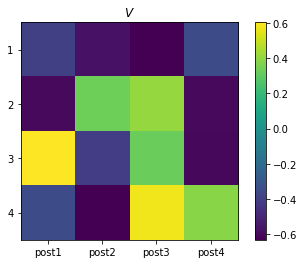

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(V, interpolation='none')
plt.xticks(range(len(c_names)))
plt.yticks(range(len(words)))
plt.ylim([len(words) - 1.5, -.5])
ax = plt.gca()
ax.set_xticklabels(c_names)
ax.set_yticklabels(range(1, len(words) + 1))
plt.title("$V$")
plt.colorbar();

Another thing the singular value decomposition tells us is what most defines the different categories of posts. The skiing posts have very different values from the hockey posts in the second row of  V , i.e.  $V_{2,1}≈V_{2,4}$  and  $V_{2,2}≈V_{2,3}$  but  $V_{2,1}≠V_{2,2}$.

Recall from above that:

$a_i =u_1∗σ_1∗V_{1,i}+u_2∗σ_2∗V_{2,i}+...$

Thus the posts differ very much in how much the values in  $u_2$  contribute to their final word count.

In [23]:
pd.DataFrame(U[:,1], index=words)

,0
ice,0.018526
snow,-0.678291
tahoe,-0.519801
goal,0.370263
puck,0.363717


From this we can conclude that, at least in this small data set, the words 'snow' and 'tahoe' identify a different class of posts from the words 'goal' and 'puck'.

## SVD on BBC News

Let's apply what we just learned to analyzing some real world BBC news articles.

In [25]:
df = pd.read_csv('../data/bbc_text.csv')
df.head(5)

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [30]:
df.shape

(2225, 2)

<AxesSubplot:>

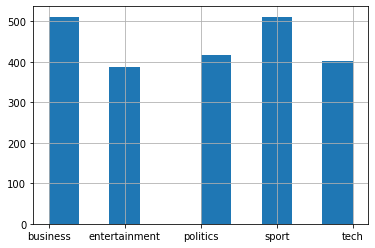

In [26]:
df["labels"].hist()

Let's ignore the labels to see if we can find clusters of text that reflect the actual labels.

In [59]:
news = df["text"]
news.head(2)

0    Ad sales boost Time Warner profit\n\nQuarterly...
1    Dollar gains on Greenspan speech\n\nThe dollar...
Name: text, dtype: object

Let's do some preprocess of the text:
- remove punctuations
- stopword removal
- lemmatization
- casefold

In [55]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

punct_remover = RegexpTokenizer(r'\w+')
news_tokens = [punct_remover.tokenize(n) for n in news]

len(news_tokens)

2225

In [64]:
lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words("english"))

def lemmatize_text(input):
    output = ""
    for w in input:
        candidate = lemmatizer.lemmatize(w).casefold()
        if candidate not in stop_words:
            output += candidate + " "
    return output

news_lemmas = [lemmatize_text(n) for n in news_tokens]

print(news_lemmas[:1])

['ad sale boost time warner profit quarterly profit us medium giant timewarner jumped 76 1 13bn 600m three month december 639m year earlier firm one biggest investor google benefited sale high speed internet connection higher advert sale timewarner said fourth quarter sale rose 2 11 1bn 10 9bn profit buoyed one gain offset profit dip warner bros le user aol time warner said friday owns 8 search engine google internet business aol ha mixed fortune lost 464 000 subscriber fourth quarter profit lower preceding three quarter however company said aol underlying profit exceptional item rose 8 back stronger internet advertising revenue hope increase subscriber offering online service free timewarner internet customer try sign aol existing customer high speed broadband timewarner also ha restate 2000 2003 result following probe us securities exchange commission sec close concluding time warner fourth quarter profit slightly better analyst expectation film division saw profit slump 27 284m help

In [69]:
news_df = pd.DataFrame(news_lemmas, columns=['news'])
news_df.shape

(2225, 1)

In [70]:
news_df.head(2)

,news
0,ad sale boost time warner profit quarterly pro...
1,dollar gain greenspan speech dollar ha hit hig...


TF-IDF: term frequency inverse document frequency

TFIDF is a more reliable metric than plain frequency because it normalizes frequency across documents. Very common (and semantically meaningless) words like articles (‘the’, ‘a’, ‘an’ …), prepositions, etc… are in this way given less weight and filtered out

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
Xtrain = tfidf.fit_transform(news_df["news"])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD 

svd=TruncatedSVD(n_components=1000)

# DTM_tfidf results are normalized. Since LSA/SVD results are
# not normalized, we have to redo the normalization:
normalizer = StandardScaler()
lsa = make_pipeline(svd, normalizer)

X_truncated = lsa.fit_transform(Xtrain)
len(X_truncated)

In [ ]:
print("Explained variance of the SVD step: {}%"
      .format(int(svd.explained_variance_ratio_.sum() * 100)))